In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/customer_churn.csv')
dados.shape

(7043, 18)

In [3]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [4]:
traducao_dict = {
    'Nao': 0,
    'Sim': 1
}

# modificacao manual
dados_modificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 
                           'PagamentoOnline', 'Churn']].replace(traducao_dict)
dados_modificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [5]:
# transformacao pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 
                                          'PagamentoOnline', 'Churn'], axis=1))
dados_final = pd.concat([dados_modificados, dummie_dados], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [6]:
dados_final.shape

(7043, 39)

In [7]:
pd.set_option('display.max_columns', 39)

In [8]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


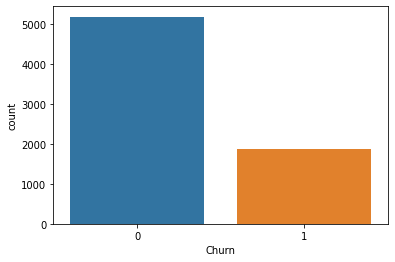

In [9]:
from pandas.core.indexes.interval import InvalidIndexError
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [10]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 8.7 MB/s 
     |████████████████████████████████| 199 kB 16.2 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [11]:
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

In [12]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y) # realiza reamostragem

In [13]:
dados_final = pd.concat([X, y], axis=1)
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


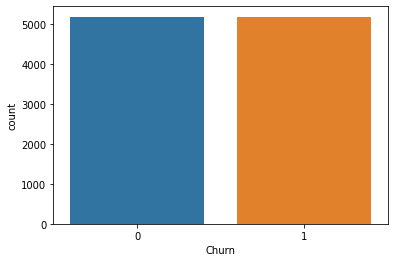

In [14]:
ax = sns.countplot(x='Churn', data=dados_final)

In [15]:
dados_final.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [16]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [17]:
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

In [18]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

In [19]:
X_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.8149851 , -0.41334384,
       -1.10768354, -1.32176205, -0.88482108,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
       -0.44617598, -0.64211419,  0.87997069, -0.44617598, -0.52426638,
        1.18643645, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78992399, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
        1.30292044, -0.47943196, -0.43617215])

In [20]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns=X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.8149851 , -0.41334384,
        -1.14934709, -0.97235471,  1.13017199, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
         2.24126814, -0.64211419, -1.13640148,  2.24126814, -0.52426638,
         1.18643645, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26594459, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76750657, -0.47943196,  2.29267273]])

### Distância Euclidiana:

$d = \sqrt{(X_{1} - Y_{1})^2 + \text{ ... } + (X_{n} - Y_{n})^2} \\
\sqrt{\sum_{i = 1}^k(a_{i} - b_{i})^2}$

In [21]:
import numpy as np

a = Xmaria_normalizado
b = X_normalizado[0]

In [22]:
# 1 - começamos subtraindo

a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166355,  0.34940734,  2.01499307, -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01637218,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03436608,  0.        ,
         2.05586858,  0.        , -2.09323857,  2.80145225,  0.        ,
        -2.07042701,  0.        ,  2.72884488]])

In [23]:
# 2 - depois realizamos a exponenciação
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73585140e-03, 1.22085486e-01, 4.06019707e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06575675e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13864535e+00, 0.00000000e+00, 4.22659561e+00, 0.00000000e+00,
        4.38164773e+00, 7.84813473e+00, 0.00000000e+00, 4.28666801e+00,
        0.00000000e+00, 7.44659439e+00]])

In [24]:
# 3 - a soma
np.sum(np.square(a-b))

91.70603225977928

In [25]:
# 4 - tiramos a raiz, temos a distância entre dois pontos
np.sqrt(np.sum(np.square(a-b)))

9.576326657950807

### Distância de Manhattan

$d = |X_{1} - Y_{1}| + \text{ ... } + |X_{n} - Y_{n}| \\
\sum_{i = 1}^k|a_{i} - b_{i}|$

### Distância de Minkowski

$d = \sqrt[m]{|X_{1} - Y_{1}|^m + \text{ ... } + |X_{n} - Y_{n}|^m} \\ 
\sum_{i = 1}^k{\sqrt[m]{|X_{i} - Y_{i}|^m}}$

## Implementando o modelo

Calcule a distância da Maria com os(as) 10 primeiros(as) clientes da nossa base de dados normalizada utilizando a métrica euclidiana.

In [26]:
def distancia_euclidiana(x, X):
  return np.sum(np.sqrt(np.square(X - x)), axis=1)

distancias = distancia_euclidiana(Xmaria_normalizado, X_normalizado)
distancias.shape

(10348,)

In [27]:
def knn(x, X, k=3):
  distances = distancia_euclidiana(x, X)
  idxsort = np.argsort(distances)
  return distances[idxsort][:k]

knn(Xmaria_normalizado, X_normalizado, k=10)

array([13.65861072, 14.66412801, 14.71960627, 15.84445038, 16.62271281,
       16.6524968 , 16.70434782, 16.7990002 , 16.93325987, 16.97180504])

### Usando scikit-learn

In [28]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

## Treino e teste

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_treino, y_treino)
predito_knn = knn.predict(X_teste)
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

In [30]:
# mediana, valor central dos nossos dados ordenados
np.median(X_treino)

-0.4461759755508453

In [32]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=-0.44)
bnb.fit(X_treino, y_treino)
predito_bnb = bnb.predict(X_teste)
predito_bnb

array([1, 0, 0, ..., 1, 1, 1])

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(X_treino, y_treino)
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

In [34]:
predito_dtc = dtc.predict(X_teste)
predito_dtc

array([0, 0, 0, ..., 1, 1, 1])

### Matriz de confusão

In [38]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_teste, predito_knn))

[[1241  328]
 [ 247 1289]]


In [39]:
print(confusion_matrix(y_teste, predito_bnb))

[[1050  519]
 [ 242 1294]]


In [40]:
print(confusion_matrix(y_teste, predito_dtc))

[[1249  320]
 [ 277 1259]]


### Acurácia

$ACC = \frac{TP + TN}{TP + FP + TN + FN}$

In [41]:
from sklearn.metrics import accuracy_score

# modelo KNN
print(accuracy_score(y_teste, predito_knn))

0.8148148148148148


In [42]:
# modelo Bernoulli de naive bayes
print(accuracy_score(y_teste, predito_bnb))

0.7549114331723027


In [43]:
# modelo de árvore de decisão
print(accuracy_score(y_teste, predito_dtc))

0.8077294685990338


### Precisão

$PS = \frac{TP}{TP + FP}$

In [44]:
from sklearn.metrics import precision_score

# modelo KNN
print(precision_score(y_teste, predito_knn))

0.7971552257266543


In [45]:
# modelo Bernoulli de naive bayes
print(precision_score(y_teste, predito_bnb))

0.7137341423055709


In [46]:
# modelo de árvore de decisão
print(precision_score(y_teste, predito_dtc))

0.7973400886637112


### Recall

$RC = \frac{TP}{TP + FN}$

In [47]:
from sklearn.metrics import recall_score

# modelo KNN
print(recall_score(y_teste, predito_knn))

0.8391927083333334


In [50]:
# modelo Bernoulli de naive bayes
print(recall_score(y_teste, predito_bnb))

0.8424479166666666


In [51]:
# modelo de árvore de decisão
print(recall_score(y_teste, predito_dtc))

0.8196614583333334


### Escolhendo o melhor modelo

In [52]:
# Exemplo - análise das precisões calculadas anteriormente
print('Modelo KNN: ', precision_score(y_teste, predito_knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_teste, predito_bnb))
print('Modelo Árvore de Decisão: ', precision_score(y_teste, predito_dtc))

Modelo KNN:  0.7971552257266543
Modelo Bernoulli de Naive Bayes:  0.7137341423055709
Modelo Árvore de Decisão:  0.7973400886637112
